In [234]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [235]:
import os
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import pickle
from shapely.geometry import Polygon
from utils import *
from region import Region
import shapely.geometry
import pandas as pd

In [236]:
tk_cen_path = os.path.join("data","census","tk_summary.xlsx")
za_cen_path = os.path.join("data","census","za_summary.xlsx")
eg_cen_path = os.path.join("data","census","eg_summary.xlsx")

In [237]:
tk_cen = pd.read_excel(tk_cen_path, "mean")
za_cen = pd.read_excel(za_cen_path, "mean")
eg_cen = pd.read_excel(eg_cen_path, "mean")
tk_cen = tk_cen.groupby(["region","city","year"]).mean().reset_index()
za_cen = za_cen.groupby(["region","city","year"]).mean().reset_index()
eg_cen = eg_cen.groupby(["region","city","year"]).mean().reset_index()

In [238]:
Ordu = pickle.load(open(os.path.join("data","Ordu.pkl"),"rb"))
Trabzon = pickle.load(open(os.path.join("data","Trabzon.pkl"),"rb"))
Adana = pickle.load(open(os.path.join("data","Adana.pkl"),"rb"))
Manisa = pickle.load(open(os.path.join("data","Manisa.pkl"),"rb"))
Johannesburg = pickle.load(open(os.path.join("data","Johannesburg.pkl"),"rb"))
Cairo = pickle.load(open(os.path.join("data","Cairo.pkl"),"rb"))

In [239]:
lcz_path = os.path.join ('data','lcz','lcz_filter_v1.tif')

c = Region(Cairo.df, level = "NAME_1", name="cario", lcz_path=lcz_path)
c.inner_box.create_box([(30.4, 30.8),  (29.7, 31.8)])
c.outer_box.create_box([(31.4, 29.8),  (28.7, 32.8)])
# c.admin_region.select(["Al Qahirah"])

c.inner_box.bound_census(eg_cen,"city")
c.house = Cairo.house

In [241]:
pickle.dump(c, open(os.path.join("data","Cairo_v1.pkl"),"wb"))

PicklingError: Can't pickle <class 'lclu.lcz.LCZ'>: it's not the same object as lclu.lcz.LCZ

<AxesSubplot:>

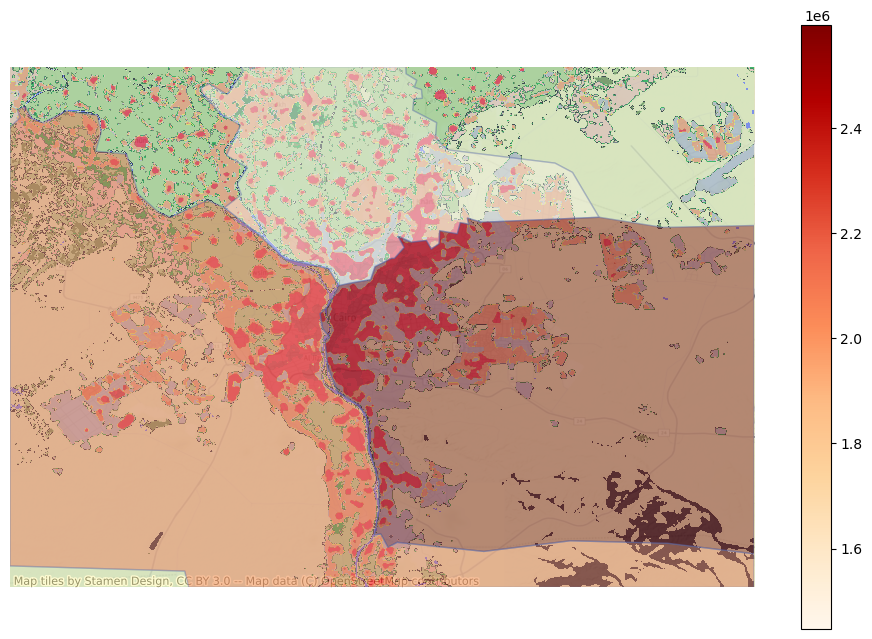

In [240]:
c.create_map_static("household_number")


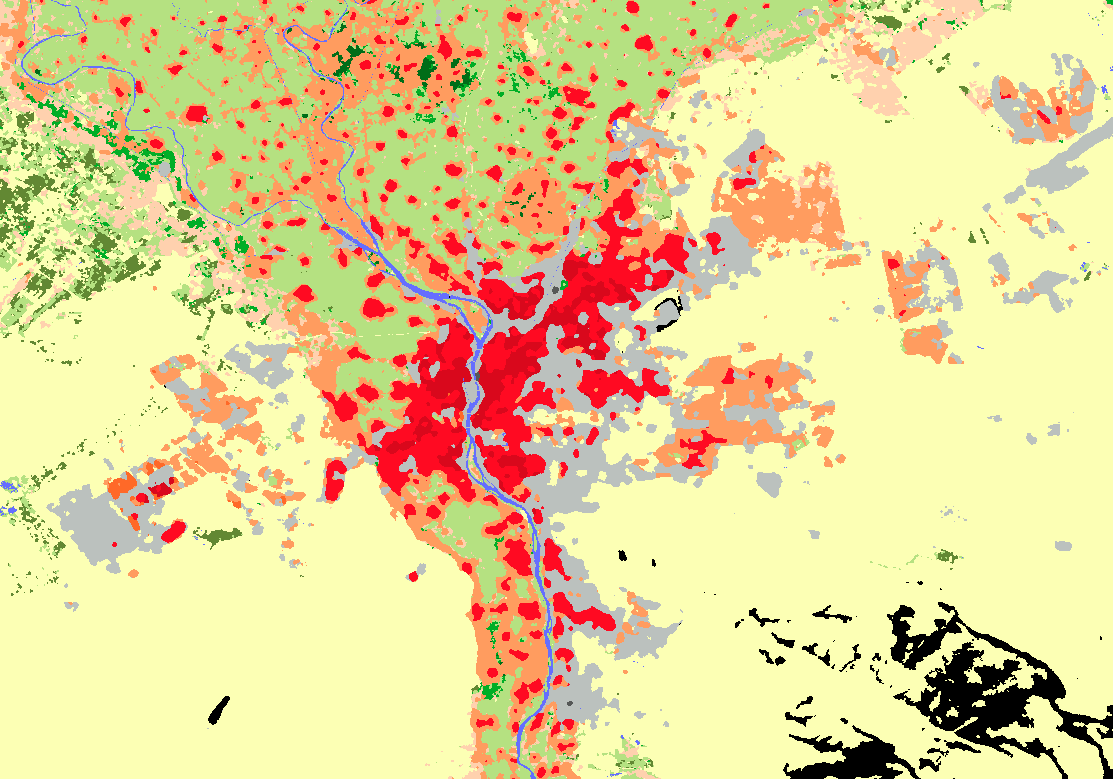

In [228]:
c.create_map_interactive("population")